# Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV # data split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [3]:
df.shape

(373, 15)

# Change data type

In [4]:
df['M/F']= df['M/F'].replace('F', 0)
df['M/F']=df['M/F'].replace('M', 1)

In [5]:
df['Group']= df['Group'].replace('Nondemented', 0)
df['Group']=df['Group'].replace('Demented', 1)
df['Group']=df['Group'].replace('Converted', 2)
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,0,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,0,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [7]:
# Check missing values 
pd.isnull(df).sum() 

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

# Dropped the rows with missing values 

In [8]:
df= df.dropna(axis=0, how='any')
pd.isnull(df).sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [9]:
df['Group'].value_counts()

0    190
1    127
2     37
Name: Group, dtype: int64

# Data Visualization

<AxesSubplot: ylabel='Type'>

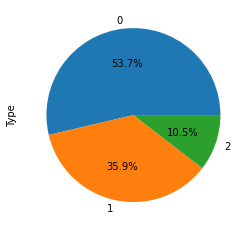

In [10]:
df.groupby('Group').size().plot(kind='pie',y = "Group",label = "Type",autopct='%1.1f%%')

In [11]:
dfy= df['Group']
list = ['Group','Subject ID','MRI ID', 'eTIV','Visit', 'Hand','SES']
dfx= df.drop(list, axis=1) 

# Splitting data

In [12]:
y = dfy
X = dfx
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Most important features 

In [13]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

CDR         0.572645
MMSE        0.265528
EDUC        0.102413
nWBV        0.092981
ASF         0.092218
M/F         0.077211
Age         0.034310
MR Delay    0.033321
dtype: float64

<AxesSubplot: >

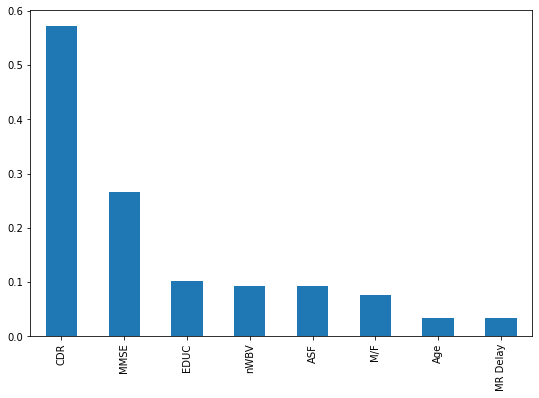

In [14]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(9, 6))

# SVM classifier using SVC class

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'rbf', random_state=45, C=1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred1 = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred1))


Accuracy: 0.873


# Select the optimal C

In [16]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001,0.01,0.1,0.2,0.3,0.4,0.5,1]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train_std, y_train)
#clf.cv_results_
clf.best_params_

{'C': 1}

# SVM classifier using SGDClassifier

In [17]:
from sklearn.linear_model import SGDClassifier
 
# Instantiate SVM classifier using SGDClassifier
svm1 = SGDClassifier(loss='hinge',random_state=45)
 
# Fit the model
svm1.fit(X_train_std, y_train)
 
# Model Performance
y_pred2 = svm1.predict(X_test_std)

print('SVM Accuracy: %.3f' % accuracy_score(y_test, y_pred2))

SVM Accuracy: 0.859


# Adaboost classifer

In [18]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=20,
                         learning_rate=0.0001,random_state=45)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred3 = model.predict(X_test)

print('Adaboost Accuracy: %.3f' % accuracy_score(y_test, y_pred3))

Adaboost Accuracy: 0.873


# Adaboost using svc as base_estimator

In [19]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc1=SVC(probability=True, kernel='linear',random_state=45)

# Create adaboost classifer object
abc1 =AdaBoostClassifier(n_estimators=20, base_estimator=svc1,learning_rate=1.3,random_state=45)

# Train Adaboost Classifer
model2 = abc1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred4 = model2.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred4))

Accuracy: 0.634


# Random forest

In [20]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=45)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

print("RF Accuracy: %.3f" % accuracy_score(y_test, predictions))

RF Accuracy: 0.901


# Oversampling

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
ros = RandomOverSampler(random_state=45)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [26]:
#rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_resampled, y_resampled)
predictions1 = rf_model.predict(X_test)

#RF_acu= metrics.accuracy_score(y_test, predictions)
#print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("RF Accuracy: %.3f" % metrics.accuracy_score(y_test, predictions1))

RF Accuracy: 0.944
